In [1]:
df = pd.read_csv("datasets_228_482_diabetes.csv")
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


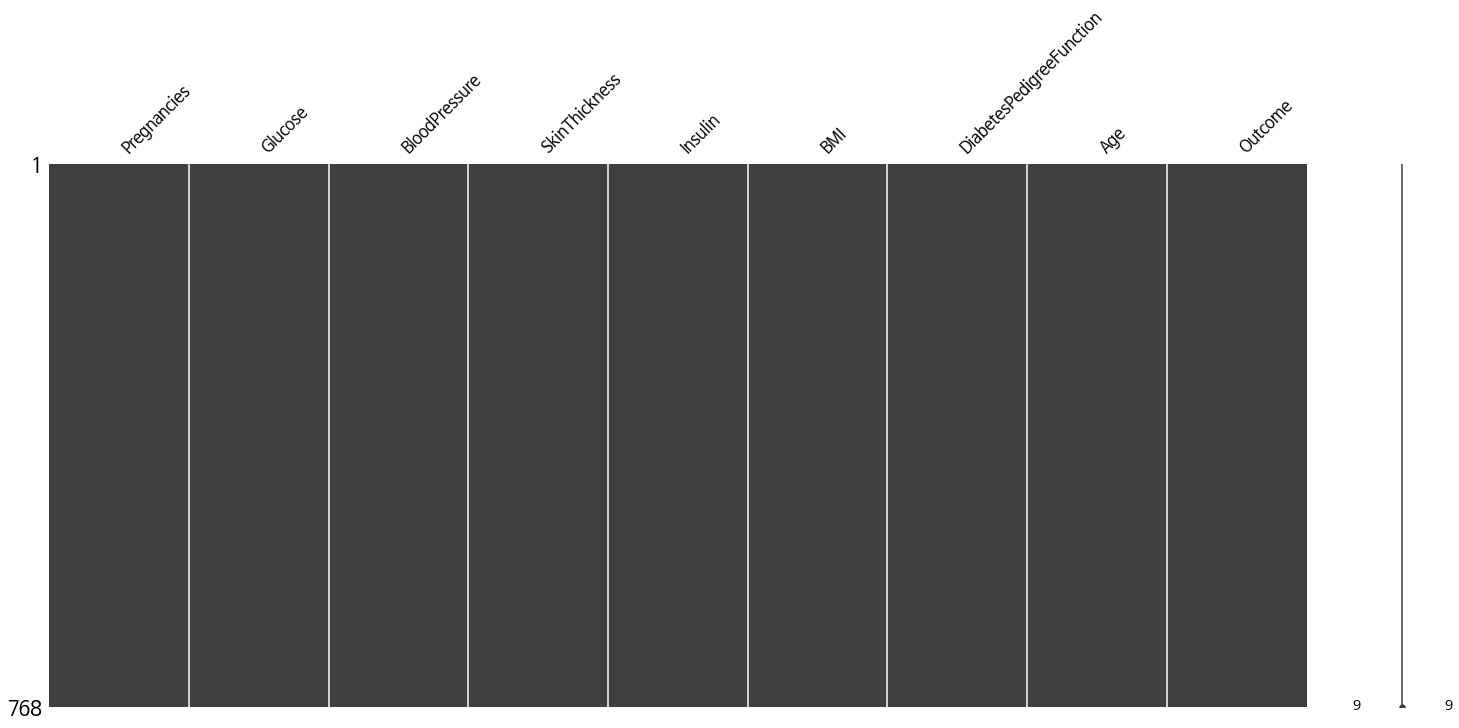

In [2]:
import missingno as msno
msno.matrix(df)

In [3]:
(df["Insulin"] > 0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [4]:
# 인슐린값을 예측하기 위한 train 세트 만들기

train = df[df["Insulin"] > 0].copy()
train.shape

(394, 9)

In [5]:
# 인슐린값을 예측하기 위한 test 세트 만들기

test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

In [6]:
# feature_names 이라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.

feature_names = list(train.columns)
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [7]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Insulin"
label_name

'Insulin'

## EDA

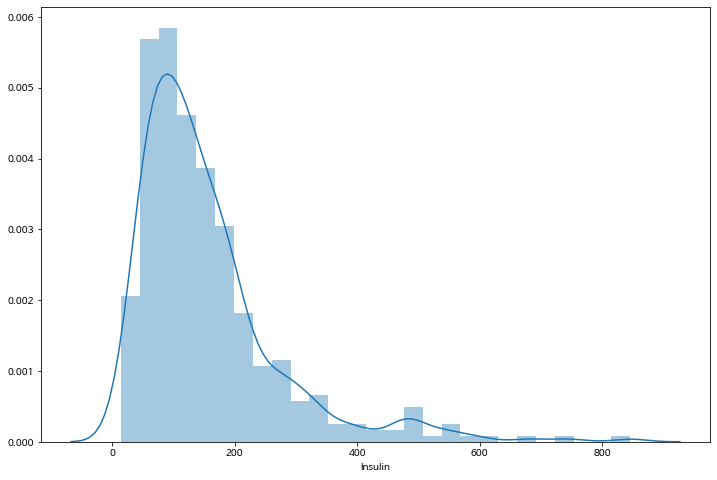

In [8]:
sns.distplot(train["Insulin"])

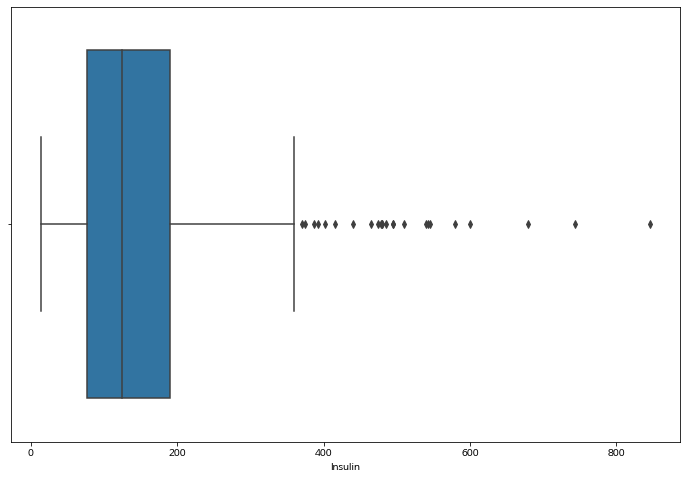

In [9]:
sns.boxplot(train["Insulin"])

In [10]:
desc = train["Insulin"].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [11]:
# IQR : 3IQR - 1IQR
# out > 3IQR + (IQR * 1.5)

IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR * 1.5)

In [12]:
train[train["Insulin"] > OUT].shape

(24, 9)

In [13]:
print(train.shape)
train = train[train["Insulin"] < OUT]
train.shape

(394, 9)


(370, 9)

## 학습,예측 데이터셋 만들기

In [14]:
# 학습세트 만들기

X_train = train[feature_names]
X_train.shape

(370, 8)

In [15]:
# 정답값을 만들어 줍니다

y_train = train[label_name]
y_train.shape

(370,)

In [16]:
# 예측에 사용할 데이터세트 만들기

X_test = test[feature_names]
X_test.shape

(374, 8)

In [17]:
# 예측의 정답값

y_test = test[label_name]
y_test.shape

(374,)

## 머신러닝 알고리즘 가져오기

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state = 42),
              RandomForestRegressor(random_state = 42),
              GradientBoostingRegressor(random_state = 42)
             ]
estimators

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=42, splitter='best'),
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False),
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='ls', max_depth=3,
                     

In [66]:
from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
    result = []
    
    max_depth = np.random.randint(5, 30, 100)
    max_features = np.random.uniform(0.3, 1.0, 100)

    param_distributions = {"max_depth" : max_depth, "max_features" : max_features}

    regressor = RandomizedSearchCV(estimator,
                      param_distributions,
                      n_iter = 100,        # n_iter 값이 높을수록 더 좋은 파라미터를 찾을 가능성이 높아진다
                      scoring = None,
                      n_jobs = None,
                      cv = 5,
                      verbose = 2,
                      random_state = 42)

    regressor.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_features=0.7583334256695947, max_depth=15 ...................
[CV] .... max_features=0.7583334256695947, max_depth=15, total=   0.0s
[CV] max_features=0.7583334256695947, max_depth=15 ...................
[CV] .... max_features=0.7583334256695947, max_depth=15, total=   0.0s
[CV] max_features=0.7583334256695947, max_depth=15 ...................
[CV] .... max_features=0.7583334256695947, max_depth=15, total=   0.0s
[CV] max_features=0.7583334256695947, max_depth=15 ...................
[CV] .... max_features=0.7583334256695947, max_depth=15, total=   0.0s
[CV] max_features=0.7583334256695947, max_depth=15 ...................
[CV] .... max_features=0.7583334256695947, max_depth=15, total=   0.0s
[CV] max_features=0.7583334256695947, max_depth=5 ....................
[CV] ..... max_features=0.7583334256695947, max_depth=5, total=   0.0s
[CV] max_features=0.7583334256695947, max_depth=5 ....................
[CV] ..... max_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_features=0.9227481447559189, max_depth=5 ....................
[CV] ..... max_features=0.9227481447559189, max_depth=5, total=   0.0s
[CV] max_features=0.8218334969177814, max_depth=13 ...................
[CV] .... max_features=0.8218334969177814, max_depth=13, total=   0.0s
[CV] max_features=0.8218334969177814, max_depth=13 ...................
[CV] .... max_features=0.8218334969177814, max_depth=13, total=   0.0s
[CV] max_features=0.8218334969177814, max_depth=13 ...................
[CV] .... max_features=0.8218334969177814, max_depth=13, total=   0.0s
[CV] max_features=0.8218334969177814, max_depth=13 ...................
[CV] .... max_features=0.8218334969177814, max_depth=13, total=   0.0s
[CV] max_features=0.8218334969177814, max_depth=13 ...................
[CV] .... max_features=0.8218334969177814, max_depth=13, total=   0.0s
[CV] max_features=0.3133523821749545, max_depth=13 ...................
[CV] .... max_features=0.3133523821749545, max_depth=13, total=   0.0s
[CV] 

[CV] .... max_features=0.9227481447559189, max_depth=23, total=   0.0s
[CV] max_features=0.9227481447559189, max_depth=23 ...................
[CV] .... max_features=0.9227481447559189, max_depth=23, total=   0.0s
[CV] max_features=0.3133523821749545, max_depth=14 ...................
[CV] .... max_features=0.3133523821749545, max_depth=14, total=   0.0s
[CV] max_features=0.3133523821749545, max_depth=14 ...................
[CV] .... max_features=0.3133523821749545, max_depth=14, total=   0.0s
[CV] max_features=0.3133523821749545, max_depth=14 ...................
[CV] .... max_features=0.3133523821749545, max_depth=14, total=   0.0s
[CV] max_features=0.3133523821749545, max_depth=14 ...................
[CV] .... max_features=0.3133523821749545, max_depth=14, total=   0.0s
[CV] max_features=0.3133523821749545, max_depth=14 ...................
[CV] .... max_features=0.3133523821749545, max_depth=14, total=   0.0s
[CV] max_features=0.6876047876438446, max_depth=5 ....................
[CV] .

[CV] .... max_features=0.6876047876438446, max_depth=23, total=   0.0s
[CV] max_features=0.6876047876438446, max_depth=23 ...................
[CV] .... max_features=0.6876047876438446, max_depth=23, total=   0.0s
[CV] max_features=0.6876047876438446, max_depth=23 ...................
[CV] .... max_features=0.6876047876438446, max_depth=23, total=   0.0s
[CV] max_features=0.6876047876438446, max_depth=23 ...................
[CV] .... max_features=0.6876047876438446, max_depth=23, total=   0.0s
[CV] max_features=0.8514312255665706, max_depth=14 ...................
[CV] .... max_features=0.8514312255665706, max_depth=14, total=   0.0s
[CV] max_features=0.8514312255665706, max_depth=14 ...................
[CV] .... max_features=0.8514312255665706, max_depth=14, total=   0.0s
[CV] max_features=0.8514312255665706, max_depth=14 ...................
[CV] .... max_features=0.8514312255665706, max_depth=14, total=   0.0s
[CV] max_features=0.8514312255665706, max_depth=14 ...................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning


[CV] max_features=0.8019032383610805, max_depth=10 ...................
[CV] .... max_features=0.8019032383610805, max_depth=10, total=   0.0s
[CV] max_features=0.8019032383610805, max_depth=10 ...................
[CV] .... max_features=0.8019032383610805, max_depth=10, total=   0.0s
[CV] max_features=0.8019032383610805, max_depth=10 ...................
[CV] .... max_features=0.8019032383610805, max_depth=10, total=   0.0s
[CV] max_features=0.8019032383610805, max_depth=10 ...................
[CV] .... max_features=0.8019032383610805, max_depth=10, total=   0.1s
[CV] max_features=0.8019032383610805, max_depth=19 ...................
[CV] .... max_features=0.8019032383610805, max_depth=19, total=   0.1s
[CV] max_features=0.8019032383610805, max_depth=19 ...................
[CV] .... max_features=0.8019032383610805, max_depth=19, total=   0.0s
[CV] max_features=0.8019032383610805, max_depth=19 ...................
[CV] .... max_features=0.8019032383610805, max_depth=19, total=   0.1s
[CV] 

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] .... max_features=0.8019032383610805, max_depth=19, total=   0.1s
[CV] max_features=0.8019032383610805, max_depth=19 ...................
[CV] .... max_features=0.8019032383610805, max_depth=19, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=11 ...................
[CV] .... max_features=0.6697016027917295, max_depth=11, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=11 ...................
[CV] .... max_features=0.6697016027917295, max_depth=11, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=11 ...................
[CV] .... max_features=0.6697016027917295, max_depth=11, total=   0.1s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV] max_features=0.6697016027917295, max_depth=11 ...................
[CV] .... max_features=0.6697016027917295, max_depth=11, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=11 ...................
[CV] .... max_features=0.6697016027917295, max_depth=11, total=   0.0s
[CV] max_features=0.6541696327251698, max_depth=25 ...................
[CV] .... max_features=0.6541696327251698, max_depth=25, total=   0.0s
[CV] max_features=0.6541696327251698, max_depth=25 ...................
[CV] .... max_features=0.6541696327251698, max_depth=25, total=   0.0s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV] max_features=0.6541696327251698, max_depth=25 ...................
[CV] .... max_features=0.6541696327251698, max_depth=25, total=   0.0s
[CV] max_features=0.6541696327251698, max_depth=25 ...................
[CV] .... max_features=0.6541696327251698, max_depth=25, total=   0.0s
[CV] max_features=0.6541696327251698, max_depth=25 ...................
[CV] .... max_features=0.6541696327251698, max_depth=25, total=   0.0s
[CV] max_features=0.9899584922271842, max_depth=25 ...................
[CV] .... max_features=0.9899584922271842, max_depth=25, total=   0.0s
[CV] max_features=0.9899584922271842, max_depth=25 ...................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

[CV] .... max_features=0.9899584922271842, max_depth=25, total=   0.0s
[CV] max_features=0.9899584922271842, max_depth=25 ...................
[CV] .... max_features=0.9899584922271842, max_depth=25, total=   0.0s
[CV] max_features=0.9899584922271842, max_depth=25 ...................
[CV] .... max_features=0.9899584922271842, max_depth=25, total=   0.0s
[CV] max_features=0.9899584922271842, max_depth=25 ...................
[CV] .... max_features=0.9899584922271842, max_depth=25, total=   0.0s
[CV] max_features=0.396616174544103, max_depth=18 ....................
[CV] ..... max_features=0.396616174544103, max_depth=18, total=   0.1s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV] max_features=0.396616174544103, max_depth=18 ....................
[CV] ..... max_features=0.396616174544103, max_depth=18, total=   0.0s
[CV] max_features=0.396616174544103, max_depth=18 ....................
[CV] ..... max_features=0.396616174544103, max_depth=18, total=   0.0s
[CV] max_features=0.396616174544103, max_depth=18 ....................
[CV] ..... max_features=0.396616174544103, max_depth=18, total=   0.0s
[CV] max_features=0.396616174544103, max_depth=18 ....................
[CV] ..... max_features=0.396616174544103, max_depth=18, total=   0.0s
[CV] max_features=0.6273610991304268, max_depth=6 ....................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

[CV] ..... max_features=0.6273610991304268, max_depth=6, total=   0.0s
[CV] max_features=0.6273610991304268, max_depth=6 ....................
[CV] ..... max_features=0.6273610991304268, max_depth=6, total=   0.0s
[CV] max_features=0.6273610991304268, max_depth=6 ....................
[CV] ..... max_features=0.6273610991304268, max_depth=6, total=   0.0s
[CV] max_features=0.6273610991304268, max_depth=6 ....................
[CV] ..... max_features=0.6273610991304268, max_depth=6, total=   0.0s
[CV] max_features=0.6273610991304268, max_depth=6 ....................
[CV] ..... max_features=0.6273610991304268, max_depth=6, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=10 ...................
[CV] .... max_features=0.6697016027917295, max_depth=10, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=10 ...................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

[CV] .... max_features=0.6697016027917295, max_depth=10, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=10 ...................
[CV] .... max_features=0.6697016027917295, max_depth=10, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=10 ...................
[CV] .... max_features=0.6697016027917295, max_depth=10, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=10 ...................
[CV] .... max_features=0.6697016027917295, max_depth=10, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=11 ...................
[CV] .... max_features=0.6697016027917295, max_depth=11, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=11 ...................
[CV] .... max_features=0.6697016027917295, max_depth=11, total=   0.0s


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

[CV] max_features=0.6697016027917295, max_depth=11 ...................
[CV] .... max_features=0.6697016027917295, max_depth=11, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=11 ...................
[CV] .... max_features=0.6697016027917295, max_depth=11, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=11 ...................
[CV] .... max_features=0.6697016027917295, max_depth=11, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=5 ....................
[CV] ..... max_features=0.6697016027917295, max_depth=5, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=5 ....................
[CV] ..... max_features=0.6697016027917295, max_depth=5, total=   0.0s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T


[CV] max_features=0.6697016027917295, max_depth=5 ....................
[CV] ..... max_features=0.6697016027917295, max_depth=5, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=5 ....................
[CV] ..... max_features=0.6697016027917295, max_depth=5, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=5 ....................
[CV] ..... max_features=0.6697016027917295, max_depth=5, total=   0.0s
[CV] max_features=0.527191828804552, max_depth=11 ....................
[CV] ..... max_features=0.527191828804552, max_depth=11, total=   0.0s
[CV] max_features=0.527191828804552, max_depth=11 ....................
[CV] ..... max_features=0.527191828804552, max_depth=11, total=   0.0s
[CV] max_features=0.527191828804552, max_depth=11 ....................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

[CV] ..... max_features=0.527191828804552, max_depth=11, total=   0.0s
[CV] max_features=0.527191828804552, max_depth=11 ....................
[CV] ..... max_features=0.527191828804552, max_depth=11, total=   0.0s
[CV] max_features=0.527191828804552, max_depth=11 ....................
[CV] ..... max_features=0.527191828804552, max_depth=11, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=18 ...................
[CV] .... max_features=0.6697016027917295, max_depth=18, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=18 ...................
[CV] .... max_features=0.6697016027917295, max_depth=18, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=18 ...................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

[CV] .... max_features=0.6697016027917295, max_depth=18, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=18 ...................
[CV] .... max_features=0.6697016027917295, max_depth=18, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=18 ...................
[CV] .... max_features=0.6697016027917295, max_depth=18, total=   0.0s
[CV] max_features=0.8019032383610805, max_depth=11 ...................
[CV] .... max_features=0.8019032383610805, max_depth=11, total=   0.0s
[CV] max_features=0.8019032383610805, max_depth=11 ...................
[CV] .... max_features=0.8019032383610805, max_depth=11, total=   0.0s
[CV] max_features=0.8019032383610805, max_depth=11 ...................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

[CV] .... max_features=0.8019032383610805, max_depth=11, total=   0.1s
[CV] max_features=0.8019032383610805, max_depth=11 ...................
[CV] .... max_features=0.8019032383610805, max_depth=11, total=   0.0s
[CV] max_features=0.8019032383610805, max_depth=11 ...................
[CV] .... max_features=0.8019032383610805, max_depth=11, total=   0.0s
[CV] max_features=0.8019032383610805, max_depth=18 ...................
[CV] .... max_features=0.8019032383610805, max_depth=18, total=   0.0s
[CV] max_features=0.8019032383610805, max_depth=18 ...................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] .... max_features=0.8019032383610805, max_depth=18, total=   0.1s
[CV] max_features=0.8019032383610805, max_depth=18 ...................
[CV] .... max_features=0.8019032383610805, max_depth=18, total=   0.0s
[CV] max_features=0.8019032383610805, max_depth=18 ...................
[CV] .... max_features=0.8019032383610805, max_depth=18, total=   0.1s
[CV] max_features=0.8019032383610805, max_depth=18 ...................
[CV] .... max_features=0.8019032383610805, max_depth=18, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=17 ...................
[CV] .... max_features=0.6697016027917295, max_depth=17, total=   0.0s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T


[CV] max_features=0.6697016027917295, max_depth=17 ...................
[CV] .... max_features=0.6697016027917295, max_depth=17, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=17 ...................
[CV] .... max_features=0.6697016027917295, max_depth=17, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=17 ...................
[CV] .... max_features=0.6697016027917295, max_depth=17, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=17 ...................
[CV] .... max_features=0.6697016027917295, max_depth=17, total=   0.0s
[CV] max_features=0.9899584922271842, max_depth=5 ....................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

[CV] ..... max_features=0.9899584922271842, max_depth=5, total=   0.0s
[CV] max_features=0.9899584922271842, max_depth=5 ....................
[CV] ..... max_features=0.9899584922271842, max_depth=5, total=   0.0s
[CV] max_features=0.9899584922271842, max_depth=5 ....................
[CV] ..... max_features=0.9899584922271842, max_depth=5, total=   0.0s
[CV] max_features=0.9899584922271842, max_depth=5 ....................
[CV] ..... max_features=0.9899584922271842, max_depth=5, total=   0.0s
[CV] max_features=0.9899584922271842, max_depth=5 ....................
[CV] ..... max_features=0.9899584922271842, max_depth=5, total=   0.0s
[CV] max_features=0.3268237182004162, max_depth=11 ...................
[CV] .... max_features=0.3268237182004162, max_depth=11, total=   0.0s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T


[CV] max_features=0.3268237182004162, max_depth=11 ...................
[CV] .... max_features=0.3268237182004162, max_depth=11, total=   0.0s
[CV] max_features=0.3268237182004162, max_depth=11 ...................
[CV] .... max_features=0.3268237182004162, max_depth=11, total=   0.0s
[CV] max_features=0.3268237182004162, max_depth=11 ...................
[CV] .... max_features=0.3268237182004162, max_depth=11, total=   0.0s
[CV] max_features=0.3268237182004162, max_depth=11 ...................
[CV] .... max_features=0.3268237182004162, max_depth=11, total=   0.0s
[CV] max_features=0.5437224689016328, max_depth=11 ...................
[CV] .... max_features=0.5437224689016328, max_depth=11, total=   0.0s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T


[CV] max_features=0.5437224689016328, max_depth=11 ...................
[CV] .... max_features=0.5437224689016328, max_depth=11, total=   0.0s
[CV] max_features=0.5437224689016328, max_depth=11 ...................
[CV] .... max_features=0.5437224689016328, max_depth=11, total=   0.0s
[CV] max_features=0.5437224689016328, max_depth=11 ...................
[CV] .... max_features=0.5437224689016328, max_depth=11, total=   0.0s
[CV] max_features=0.5437224689016328, max_depth=11 ...................
[CV] .... max_features=0.5437224689016328, max_depth=11, total=   0.1s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV] max_features=0.6273610991304268, max_depth=11 ...................
[CV] .... max_features=0.6273610991304268, max_depth=11, total=   0.1s
[CV] max_features=0.6273610991304268, max_depth=11 ...................
[CV] .... max_features=0.6273610991304268, max_depth=11, total=   0.1s
[CV] max_features=0.6273610991304268, max_depth=11 ...................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] .... max_features=0.6273610991304268, max_depth=11, total=   0.1s
[CV] max_features=0.6273610991304268, max_depth=11 ...................
[CV] .... max_features=0.6273610991304268, max_depth=11, total=   0.0s
[CV] max_features=0.6273610991304268, max_depth=11 ...................
[CV] .... max_features=0.6273610991304268, max_depth=11, total=   0.1s
[CV] max_features=0.5486969255407532, max_depth=18 ...................
[CV] .... max_features=0.5486969255407532, max_depth=18, total=   0.1s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV] max_features=0.5486969255407532, max_depth=18 ...................
[CV] .... max_features=0.5486969255407532, max_depth=18, total=   0.1s
[CV] max_features=0.5486969255407532, max_depth=18 ...................
[CV] .... max_features=0.5486969255407532, max_depth=18, total=   0.1s
[CV] max_features=0.5486969255407532, max_depth=18 ...................
[CV] .... max_features=0.5486969255407532, max_depth=18, total=   0.0s
[CV] max_features=0.5486969255407532, max_depth=18 ...................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] .... max_features=0.5486969255407532, max_depth=18, total=   0.1s
[CV] max_features=0.6541696327251698, max_depth=19 ...................
[CV] .... max_features=0.6541696327251698, max_depth=19, total=   0.0s
[CV] max_features=0.6541696327251698, max_depth=19 ...................
[CV] .... max_features=0.6541696327251698, max_depth=19, total=   0.0s
[CV] max_features=0.6541696327251698, max_depth=19 ...................
[CV] .... max_features=0.6541696327251698, max_depth=19, total=   0.0s
[CV] max_features=0.6541696327251698, max_depth=19 ...................
[CV] .... max_features=0.6541696327251698, max_depth=19, total=   0.0s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T


[CV] max_features=0.6541696327251698, max_depth=19 ...................
[CV] .... max_features=0.6541696327251698, max_depth=19, total=   0.0s
[CV] max_features=0.527191828804552, max_depth=10 ....................
[CV] ..... max_features=0.527191828804552, max_depth=10, total=   0.0s
[CV] max_features=0.527191828804552, max_depth=10 ....................
[CV] ..... max_features=0.527191828804552, max_depth=10, total=   0.0s
[CV] max_features=0.527191828804552, max_depth=10 ....................
[CV] ..... max_features=0.527191828804552, max_depth=10, total=   0.0s
[CV] max_features=0.527191828804552, max_depth=10 ....................
[CV] ..... max_features=0.527191828804552, max_depth=10, total=   0.0s
[CV] max_features=0.527191828804552, max_depth=10 ....................
[CV] ..... max_features=0.527191828804552, max_depth=10, total=   0.0s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T


[CV] max_features=0.3268237182004162, max_depth=6 ....................
[CV] ..... max_features=0.3268237182004162, max_depth=6, total=   0.0s
[CV] max_features=0.3268237182004162, max_depth=6 ....................
[CV] ..... max_features=0.3268237182004162, max_depth=6, total=   0.0s
[CV] max_features=0.3268237182004162, max_depth=6 ....................
[CV] ..... max_features=0.3268237182004162, max_depth=6, total=   0.0s
[CV] max_features=0.3268237182004162, max_depth=6 ....................
[CV] ..... max_features=0.3268237182004162, max_depth=6, total=   0.0s
[CV] max_features=0.3268237182004162, max_depth=6 ....................
[CV] ..... max_features=0.3268237182004162, max_depth=6, total=   0.0s
[CV] max_features=0.6273610991304268, max_depth=25 ...................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

[CV] .... max_features=0.6273610991304268, max_depth=25, total=   0.1s
[CV] max_features=0.6273610991304268, max_depth=25 ...................
[CV] .... max_features=0.6273610991304268, max_depth=25, total=   0.1s
[CV] max_features=0.6273610991304268, max_depth=25 ...................
[CV] .... max_features=0.6273610991304268, max_depth=25, total=   0.1s
[CV] max_features=0.6273610991304268, max_depth=25 ...................
[CV] .... max_features=0.6273610991304268, max_depth=25, total=   0.1s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV] max_features=0.6273610991304268, max_depth=25 ...................
[CV] .... max_features=0.6273610991304268, max_depth=25, total=   0.1s
[CV] max_features=0.396616174544103, max_depth=14 ....................
[CV] ..... max_features=0.396616174544103, max_depth=14, total=   0.0s
[CV] max_features=0.396616174544103, max_depth=14 ....................
[CV] ..... max_features=0.396616174544103, max_depth=14, total=   0.0s
[CV] max_features=0.396616174544103, max_depth=14 ....................
[CV] ..... max_features=0.396616174544103, max_depth=14, total=   0.0s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T


[CV] max_features=0.396616174544103, max_depth=14 ....................
[CV] ..... max_features=0.396616174544103, max_depth=14, total=   0.0s
[CV] max_features=0.396616174544103, max_depth=14 ....................
[CV] ..... max_features=0.396616174544103, max_depth=14, total=   0.0s
[CV] max_features=0.6541696327251698, max_depth=11 ...................
[CV] .... max_features=0.6541696327251698, max_depth=11, total=   0.0s
[CV] max_features=0.6541696327251698, max_depth=11 ...................
[CV] .... max_features=0.6541696327251698, max_depth=11, total=   0.0s
[CV] max_features=0.6541696327251698, max_depth=11 ...................
[CV] .... max_features=0.6541696327251698, max_depth=11, total=   0.0s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T


[CV] max_features=0.6541696327251698, max_depth=11 ...................
[CV] .... max_features=0.6541696327251698, max_depth=11, total=   0.0s
[CV] max_features=0.6541696327251698, max_depth=11 ...................
[CV] .... max_features=0.6541696327251698, max_depth=11, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=25 ...................
[CV] .... max_features=0.6697016027917295, max_depth=25, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=25 ...................
[CV] .... max_features=0.6697016027917295, max_depth=25, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=25 ...................
[CV] .... max_features=0.6697016027917295, max_depth=25, total=   0.0s
[CV] max_features=0.6697016027917295, max_depth=25 ...................
[CV] .... max_features=0.6697016027917295, max_depth=25, total=   0.0s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T


[CV] max_features=0.6697016027917295, max_depth=25 ...................
[CV] .... max_features=0.6697016027917295, max_depth=25, total=   0.0s
[CV] max_features=0.3268237182004162, max_depth=17 ...................
[CV] .... max_features=0.3268237182004162, max_depth=17, total=   0.0s
[CV] max_features=0.3268237182004162, max_depth=17 ...................
[CV] .... max_features=0.3268237182004162, max_depth=17, total=   0.0s
[CV] max_features=0.3268237182004162, max_depth=17 ...................
[CV] .... max_features=0.3268237182004162, max_depth=17, total=   0.1s
[CV] max_features=0.3268237182004162, max_depth=17 ...................

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV] .... max_features=0.3268237182004162, max_depth=17, total=   0.1s
[CV] max_features=0.3268237182004162, max_depth=17 ...................
[CV] .... max_features=0.3268237182004162, max_depth=17, total=   0.1s
[CV] max_features=0.396616174544103, max_depth=5 .....................
[CV] ...... max_features=0.396616174544103, max_depth=5, total=   0.1s
[CV] max_features=0.396616174544103, max_depth=5 .....................
[CV] ...... max_features=0.396616174544103, max_depth=5, total=   0.1s
[CV] max_features=0.396616174544103, max_depth=5 .....................
[CV] ...... max_features=0.396616174544103, max_depth=5, total=   0.0s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV] max_features=0.396616174544103, max_depth=5 .....................
[CV] ...... max_features=0.396616174544103, max_depth=5, total=   0.0s
[CV] max_features=0.396616174544103, max_depth=5 .....................
[CV] ...... max_features=0.396616174544103, max_depth=5, total=   0.1s
[CV] max_features=0.6273610991304268, max_depth=11 ...................
[CV] .... max_features=0.6273610991304268, max_depth=11, total=   0.1s
[CV] max_features=0.6273610991304268, max_depth=11 ...................


C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] .... max_features=0.6273610991304268, max_depth=11, total=   0.1s
[CV] max_features=0.6273610991304268, max_depth=11 ...................
[CV] .... max_features=0.6273610991304268, max_depth=11, total=   0.1s
[CV] max_features=0.6273610991304268, max_depth=11 ...................
[CV] .... max_features=0.6273610991304268, max_depth=11, total=   0.1s
[CV] max_features=0.6273610991304268, max_depth=11 ...................
[CV] .... max_features=0.6273610991304268, max_depth=11, total=   0.1s

C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_features=0.5187633539182201, max_depth=14 ...................


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.0s finished
C:\Users\JO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_features=0.5187633539182201, max_depth=14, total=   0.5s
[CV] max_features=0.5187633539182201, max_depth=14 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .... max_features=0.5187633539182201, max_depth=14, total=   0.4s
[CV] max_features=0.5187633539182201, max_depth=14 ...................
[CV] .... max_features=0.5187633539182201, max_depth=14, total=   0.3s
[CV] max_features=0.5187633539182201, max_depth=14 ...................
[CV] .... max_features=0.5187633539182201, max_depth=14, total=   0.5s
[CV] max_features=0.5187633539182201, max_depth=14 ...................
[CV] .... max_features=0.5187633539182201, max_depth=14, total=   0.2s
[CV] max_features=0.5187633539182201, max_depth=28 ...................
[CV] .... max_features=0.5187633539182201, max_depth=28, total=   0.2s
[CV] max_features=0.5187633539182201, max_depth=28 ...................
[CV] .... max_features=0.5187633539182201, max_depth=28, total=   0.3s
[CV] max_features=0.5187633539182201, max_depth=28 ...................
[CV] .... max_features=0.5187633539182201, max_depth=28, total=   0.3s
[CV] max_features=0.5187633539182201, max_depth=28 ...................
[CV] .

[CV] ..... max_features=0.318116171054263, max_depth=22, total=   0.2s
[CV] max_features=0.5187633539182201, max_depth=5 ....................
[CV] ..... max_features=0.5187633539182201, max_depth=5, total=   0.1s
[CV] max_features=0.5187633539182201, max_depth=5 ....................
[CV] ..... max_features=0.5187633539182201, max_depth=5, total=   0.1s
[CV] max_features=0.5187633539182201, max_depth=5 ....................
[CV] ..... max_features=0.5187633539182201, max_depth=5, total=   0.1s
[CV] max_features=0.5187633539182201, max_depth=5 ....................
[CV] ..... max_features=0.5187633539182201, max_depth=5, total=   0.1s
[CV] max_features=0.5187633539182201, max_depth=5 ....................
[CV] ..... max_features=0.5187633539182201, max_depth=5, total=   0.1s
[CV] max_features=0.5187633539182201, max_depth=22 ...................
[CV] .... max_features=0.5187633539182201, max_depth=22, total=   0.2s
[CV] max_features=0.5187633539182201, max_depth=22 ...................
[CV] .

[CV] .... max_features=0.6092683334559584, max_depth=20, total=   1.1s
[CV] max_features=0.6092683334559584, max_depth=20 ...................
[CV] .... max_features=0.6092683334559584, max_depth=20, total=   0.6s
[CV] max_features=0.6092683334559584, max_depth=20 ...................
[CV] .... max_features=0.6092683334559584, max_depth=20, total=   0.4s
[CV] max_features=0.9823966207254959, max_depth=26 ...................
[CV] .... max_features=0.9823966207254959, max_depth=26, total=   0.5s
[CV] max_features=0.9823966207254959, max_depth=26 ...................
[CV] .... max_features=0.9823966207254959, max_depth=26, total=   0.4s
[CV] max_features=0.9823966207254959, max_depth=26 ...................
[CV] .... max_features=0.9823966207254959, max_depth=26, total=   0.3s
[CV] max_features=0.9823966207254959, max_depth=26 ...................
[CV] .... max_features=0.9823966207254959, max_depth=26, total=   0.3s
[CV] max_features=0.9823966207254959, max_depth=26 ...................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   38.1s finished


In [67]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator", "score", "cv_result"]
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.9227481447559189, 'max_dept...","DecisionTreeRegressor(criterion='mse', max_dep...",0.222069,"{'mean_fit_time': [0.009394311904907226, 0.005..."
1,RandomForestRegressor,"{'max_features': 0.6273610991304268, 'max_dept...","(DecisionTreeRegressor(criterion='mse', max_de...",0.327432,"{'mean_fit_time': [0.033780479431152345, 0.045..."
2,GradientBoostingRegressor,"{'max_features': 0.5187633539182201, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.291479,"{'mean_fit_time': [0.37258710861206057, 0.2660..."


In [68]:
best_estimator = df_cv.loc[1, "estimator"]
best_estimator

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features=0.6273610991304268, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

## 학습(훈련)

In [69]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features=0.6273610991304268, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

## cross validation 으로 학습세트의 오차 측정하기

In [70]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv= 5, verbose= 2, n_jobs=-1)
y_predict

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.1s finished


array([ 49.64071429, 150.81997748, 129.91711622, 136.7259632 ,
       187.00750916, 131.01127558, 170.20184148, 147.94055978,
       157.75081452, 159.49203055,  77.76494064, 200.69285714,
       201.14597985,  55.38321832, 132.6756369 , 170.93753764,
       180.09687675, 186.36369543,  90.61124084, 125.79078027,
        60.6126796 , 216.44108859, 186.40212159, 231.18837607,
       101.33461657, 130.33361324, 194.60254209,  67.13339629,
       164.44932625, 140.95475816, 158.41554419, 168.47888974,
        58.56416409, 123.39032783,  98.59334551, 184.46257498,
       126.4330342 ,  87.09216702, 165.17254209, 163.17549155,
        42.06689871,  75.03876521, 163.46608059,  69.19519168,
       150.70305225, 172.64735663,  76.42272767, 116.67746975,
       180.24320208,  69.64917308, 207.42786209,  66.41955416,
       211.82174908, 116.83963339, 132.30369963, 147.91737179,
       124.07372985, 160.32152401, 151.34345733, 224.84263482,
        69.51413703, 174.14435211,  93.42426492,  85.86

In [71]:
y_predict[:5]

array([ 49.64071429, 150.81997748, 129.91711622, 136.7259632 ,
       187.00750916])

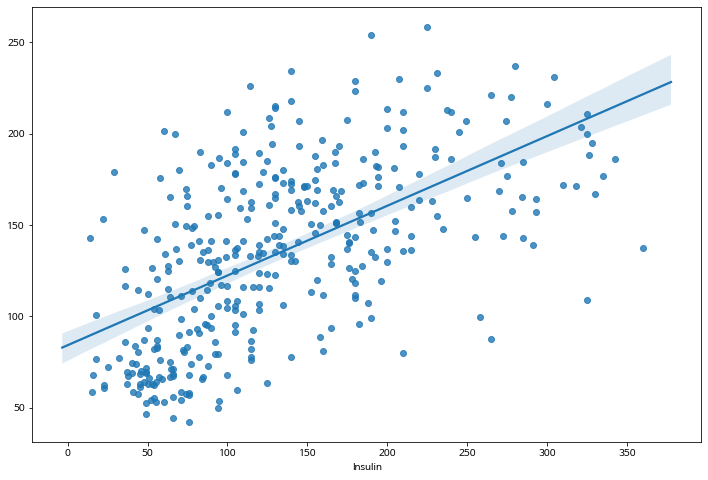

In [72]:
sns.regplot(y_train, y_predict)

In [73]:
from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

0.34056396149328017

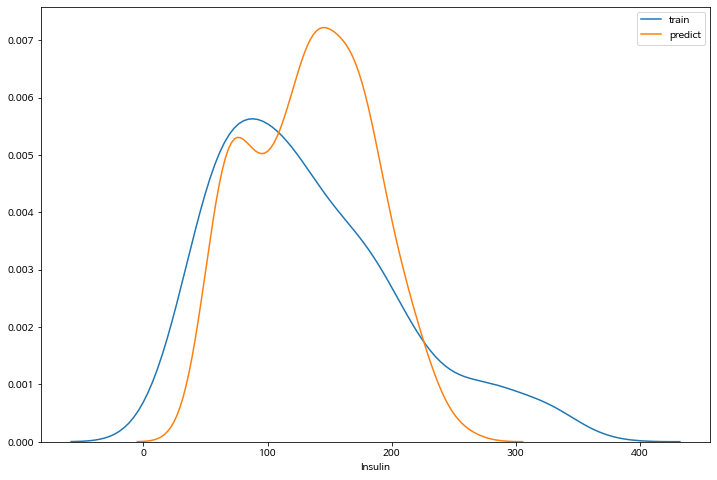

In [74]:
sns.distplot(y_train, hist = False, label = "train")
sns.distplot(y_predict, hist = False, label = "predict")

## 오차구하기

In [75]:
# MAE

error = abs(y_train - y_predict)
error.mean()

45.44309308254687

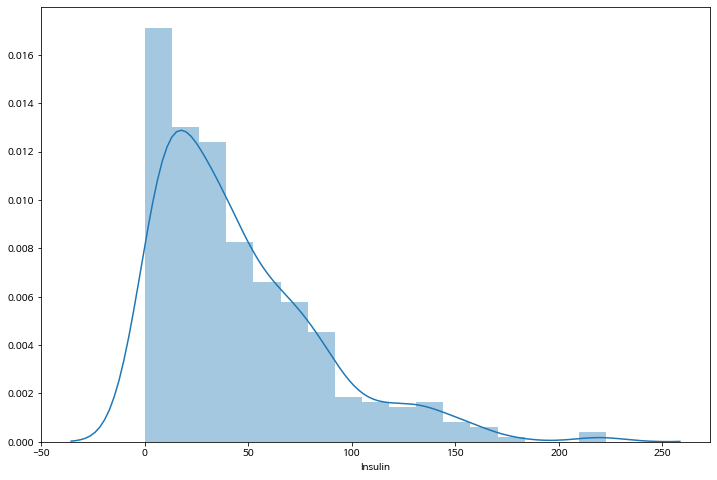

In [76]:
sns.distplot(error)

In [77]:
error.describe()

count    370.000000
mean      45.443093
std       39.601865
min        0.157365
25%       15.314404
50%       35.191867
75%       64.788684
max      222.794519
Name: Insulin, dtype: float64

In [78]:
# RMSE

np.sqrt(((y_train - y_predict) ** 2).mean())

60.24237529983628

## 트리 알고리즘 분석하기
- 의사결정나무를 시각화 합니다.
- 피처의 중요도를 구합니다.

In [86]:
# 피처의 중요도를 추출하기

best_estimator.feature_importances_

array([0.03033069, 0.43869188, 0.05191222, 0.10900044, 0.11347132,
       0.09950664, 0.07684363, 0.08024317])

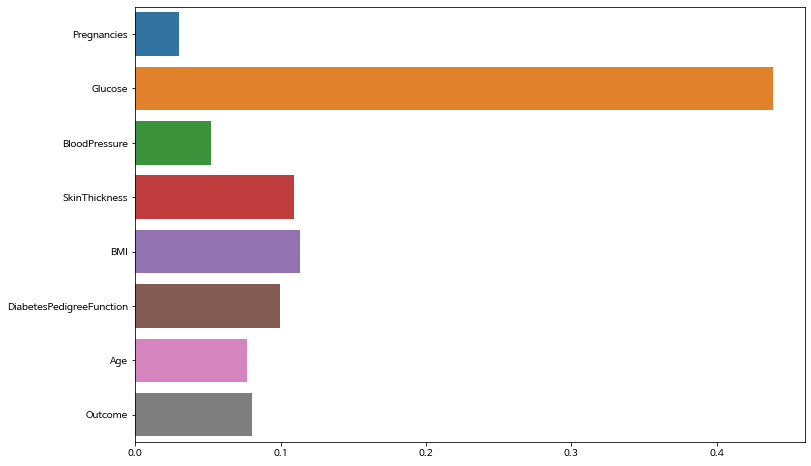

In [87]:
sns.barplot(x = best_estimator.feature_importances_, y = feature_names)

## 예측

In [88]:
y_test = best_estimator.predict(X_test)
y_test[:5]

array([168.36987086,  60.06961111, 202.04275722, 130.45424096,
       172.1426901 ])

In [89]:
train.groupby("Outcome")["Insulin"].agg(["mean", "median"])

,mean,median
Outcome,,
0,115.917323,100
1,169.163793,160


In [90]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [91]:
test["Insulin"] = y_test

In [92]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.889193,37.909406,49.576301,114.879675,135.224493,157.542703,232.368720
1,138.0,161.772700,27.941300,99.948823,140.235805,158.802263,179.412294,261.251246


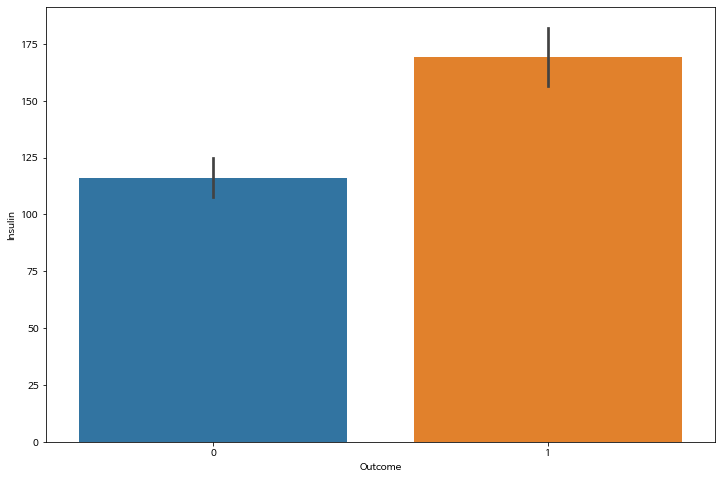

In [93]:
# Insulin의 평균값 출력
sns.barplot(data = train, x = "Outcome", y = "Insulin")

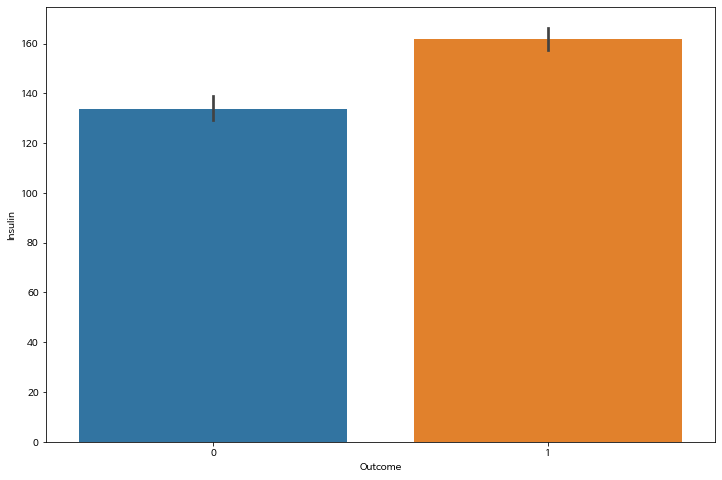

In [94]:
sns.barplot(data = test, x = "Outcome", y = "Insulin")